### Importing labriries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "white",color_codes = True)
sns.set(font_scale = 1.5)


from sklearn .linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics


### Importing the data

In [2]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
titanic_df.shape

(889, 8)

In [46]:
### checking which features are the most important

In [4]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
### checking the missing values

In [8]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
### droping useless columns 

In [10]:
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)

In [11]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
### Delling with messing values and Age variable

In [13]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
titanic_df.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [15]:
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(age_approx,axis = 1)

In [16]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [17]:
titanic_df.dropna(inplace = True)
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [47]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [48]:
### xonverting categorical feautures into numerical ones

In [22]:
titanic_df_dummies = pd.get_dummies(titanic_df, columns = ['Embarked','Sex'])

In [23]:
titanic_df_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [24]:
#### checking the correlation

In [25]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

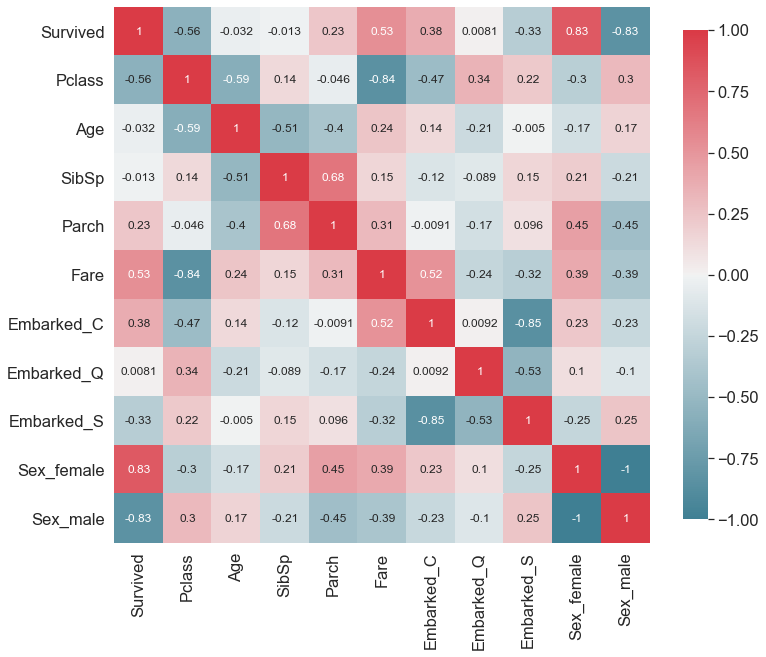

In [26]:
 plot_correlation_map(titanic_df_dummies.corr())

In [27]:
### we can notice a strong correlation between survived and female sex

### Machine learning: logistic regression

In [29]:
used_feautures = ['Pclass','Age','SibSp','Parch','Embarked_C','Embarked_Q','Embarked_S','Sex_female','Sex_male']
X = titanic_df_dummies[used_feautures].values
Y = titanic_df_dummies['Survived']

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)


In [32]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [33]:
### Applying Logistic Regression

In [35]:
LogReg = LogisticRegression()
LogReg .fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_pred = LogReg .predict(X_test)

In [50]:
# evaluating the model performence

In [37]:
metrics.confusion_matrix(Y_test,y_pred)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [38]:
metrics.accuracy_score(Y_test,y_pred)

0.8314606741573034

In [39]:
len(X_test)

267

In [40]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [41]:
LogReg.coef_

array([[-1.03670529, -0.03973281, -0.24476561, -0.04711189,  0.35713729,
        -0.01871504, -0.3016414 ,  1.2178908 , -1.18110995]])

In [42]:
LogReg.intercept_

array([3.6132902])

In [43]:
titanic_df_dummies[used_feautures].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male'],
      dtype='object')

In [44]:
LogReg.predict_proba(X_test)

array([[0.26390932, 0.73609068],
       [0.39594822, 0.60405178],
       [0.94718764, 0.05281236],
       [0.25604543, 0.74395457],
       [0.94551932, 0.05448068],
       [0.13500403, 0.86499597],
       [0.33087436, 0.66912564],
       [0.52271521, 0.47728479],
       [0.78383112, 0.21616888],
       [0.40459131, 0.59540869],
       [0.74110857, 0.25889143],
       [0.21150125, 0.78849875],
       [0.74934525, 0.25065475],
       [0.14672088, 0.85327912],
       [0.86456081, 0.13543919],
       [0.3669551 , 0.6330449 ],
       [0.89365596, 0.10634404],
       [0.29591715, 0.70408285],
       [0.17567539, 0.82432461],
       [0.40243538, 0.59756462],
       [0.90473909, 0.09526091],
       [0.55569739, 0.44430261],
       [0.8648786 , 0.1351214 ],
       [0.93904284, 0.06095716],
       [0.51876547, 0.48123453],
       [0.51266987, 0.48733013],
       [0.03924009, 0.96075991],
       [0.86914632, 0.13085368],
       [0.89825005, 0.10174995],
       [0.32109099, 0.67890901],
       [0.

In [51]:
# 2. Use a confusion matrix to validate your model. 

In [55]:
conf_mat = metrics.confusion_matrix(Y_test,y_pred)

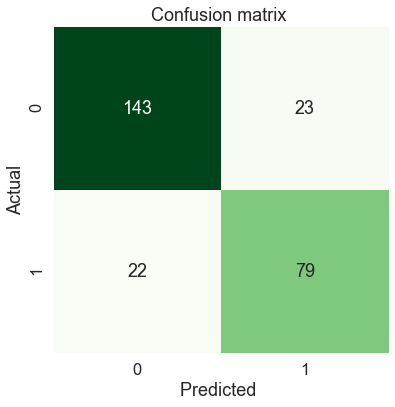

In [56]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix ')
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted ')
plt.ylabel('Actual')
plt.show()

### we can ntice that:
* here we got 22 survived passengers which are predicted as not survived. Also , we found here that there are 23 not survived passengers yet predicted as survived.

In [57]:
# 3. Another validation matrix for classification is ROC / AUC, do your research on them explain them, and apply them in our case.


### ROC / AUC
* The concept of ROC and AUC builds upon the knowledge of Confusion Matrix, Specificity and Sensitivity.


* A ROC curve shows you performance across a range of different classification thresholds and a confusion matrix only shows you one (typically when  Pr(y>0.5) ).



* A confusion matrix can be used to measure the performance of a particular classifier with a fixed threshold. Given a set of input cases, the classifier scores each one, and score above the threshold are labelled Class 1 and scores below the threshold are labelled Class 2.

* The ROC curve, on the other hand, examines the performance of a classifier without fixing the threshold. Given a set of input cases, the classifier scores each one. The ROC curve is then generated by testing every possible threshold and plotting each result as a point on the curve.

* AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than that of a randomly chosen negative example. The Area Under the Curve provides the ability for a classifier to distinguish between classes and is used as a summary of the ROC curve.

* The higher the AUC, it is assumed that the better the performance of the model at distinguishing between the positive and negative classes. 

* A confusion matrix evaluates one particular classifier with a fixed threshold, while the AUC evaluates that classifier over all possible thresholds.

LogisticRegression auc is 0.90421090


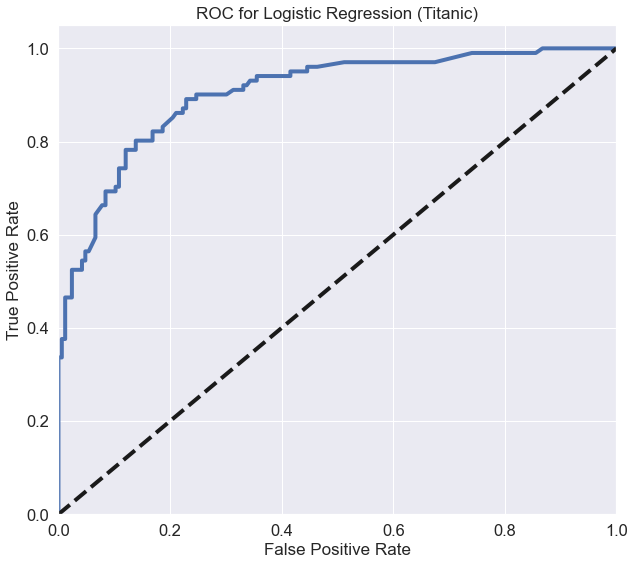

In [59]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = LogReg.decision_function(X_test) #y_pred_proba = logreg.predict_proba(X_test)[:, 1] same as this?

FPR, TPR, THR = roc_curve(Y_test, y_score) #[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba) same as this
ROC_AUC = auc(FPR, TPR)
print (LogReg.__class__.__name__+" auc is %2.8f" % ROC_AUC) #Gives AUC score.


#Next is draw roc graph.
plt.figure(figsize =[10,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 17)
plt.ylabel('True Positive Rate', fontsize = 17)
plt.title('ROC for Logistic Regression (Titanic)', fontsize= 17)
plt.show()

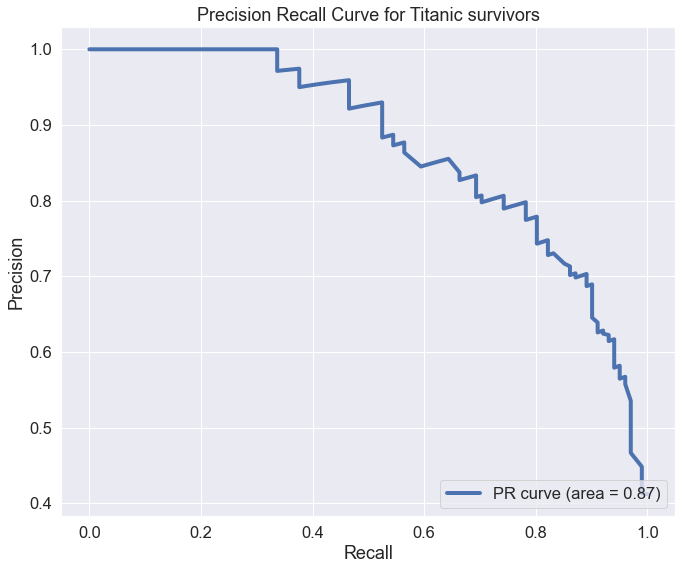

In [60]:
from sklearn.metrics import precision_recall_curve

y_score = LogReg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(Y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()